In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.rcParams['axes.grid']=True
plt.rcParams['axes.xmargin']=0

In [2]:
# Time indices of SP
Ts=1e-2; Fs=1/Ts; T  = 10
t = np.arange(0, T, Ts)

C:\Users\ricca\AppData\Local\Temp\ipykernel_34752\57699076.py:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e.mean(axis=1), color='tab:blue')
C:\Users\ricca\AppData\Local\Temp\ipykernel_34752\57699076.py:48: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s.mean(axis=1), color='tab:orange')
C:

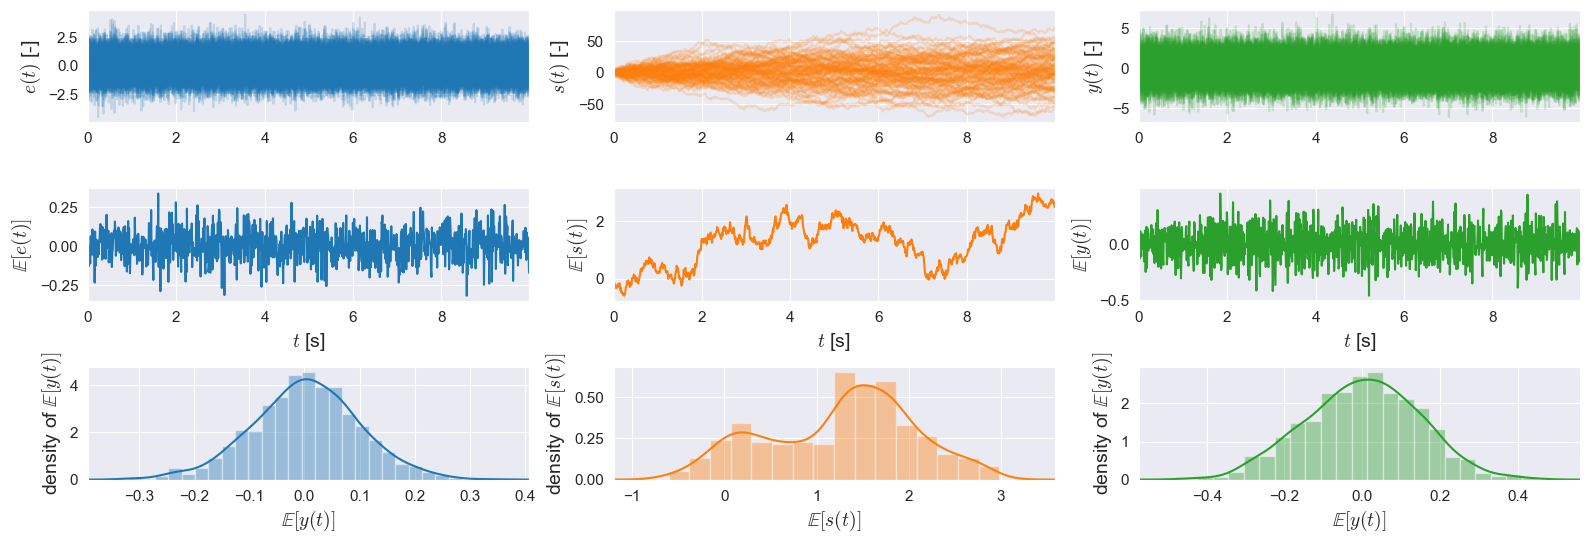

In [3]:
import copy
# Stochastic process - White Noise
mu = 0.0
lam = np.sqrt(1)
# 10 experiments
N = 100
e = np.zeros((t.shape[0], N))
# White noise
e = np.random.normal(.0, lam**2, e.shape)
# Non-stationary SP
s = copy.deepcopy(e)
for i in range(1,len(e)):
    s[i,:] += s[i-1,:] # random walk
# MA(2)
y = copy.deepcopy(e)
for i in range(2,len(e)):
    y[i,:] += 1/2*e[i-1,:] - e[i-2,:]

# Sample Expected Value
plt.figure(figsize=(16,5))
plt.subplot(331)
plt.plot(t, e, c='tab:blue', alpha=0.2)
plt.ylabel('$e(t)$ [-]')
plt.subplot(332)
plt.plot(t, s, c='tab:orange', alpha=0.2)
plt.ylabel('$s(t)$ [-]')
plt.subplot(333)
plt.plot(t, y, c='tab:green', alpha=0.2)
plt.ylabel('$y(t)$ [-]')
plt.subplot(334)
plt.plot(t, e.mean(axis=1), 'tab:blue', label=r'$\bar{e}$')
plt.xlabel('$t$ [s]')
plt.ylabel('$\mathbb{E}[e(t)]$')
plt.subplot(335)
plt.plot(t, s.mean(axis=1), 'tab:orange', label=r'$\bar{s}$')
plt.xlabel('$t$ [s]')
plt.ylabel('$\mathbb{E}[s(t)]$')
plt.subplot(336)
plt.plot(t, y.mean(axis=1), 'tab:green', label=r'$\bar{y}$')
plt.xlabel('$t$ [s]')
plt.ylabel('$\mathbb{E}[y(t)]$')
plt.tight_layout()
plt.subplot(337)
sns.distplot(e.mean(axis=1), color='tab:blue')
plt.xlabel('$\mathbb{E}[y(t)]$')
plt.ylabel('density of $\mathbb{E}[y(t)]$')
plt.subplot(338)
sns.distplot(s.mean(axis=1), color='tab:orange')
plt.xlabel('$\mathbb{E}[s(t)]$')
plt.ylabel('density of $\mathbb{E}[s(t)]$')
plt.subplot(339)
sns.distplot(y.mean(axis=1), color='tab:green')
plt.xlabel('$\mathbb{E}[y(t)]$')
plt.ylabel('density of $\mathbb{E}[y(t)]$')
plt.show()

In [4]:
e = e[:,0]
s = s[:,0]
y = y[:,0]

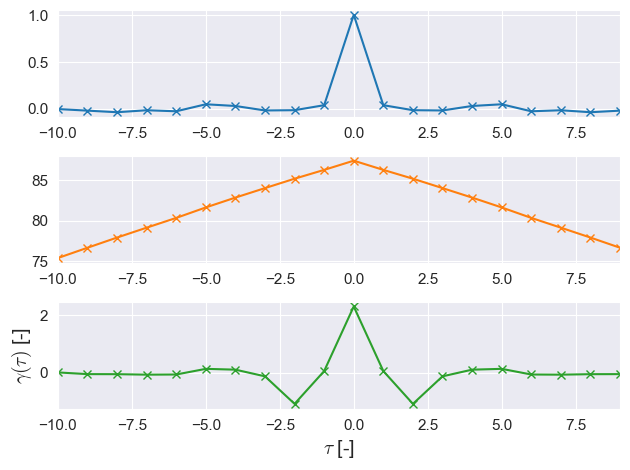

In [5]:
# Sample Covariance Covarianza campionaria

lags = np.arange(-10, 10)
cov_array_e = np.zeros(lags.shape)
cov_array_s = np.zeros(lags.shape)
cov_array_y = np.zeros(lags.shape)

for i, lag in enumerate(lags):
    cov_array_e[i] = np.cov(e, np.roll(e, lag, axis=0), rowvar=False)[0,1]
    cov_array_s[i] = np.cov(s, np.roll(s, lag, axis=0), rowvar=False)[0,1]
    cov_array_y[i] = np.cov(y, np.roll(y, lag, axis=0), rowvar=False)[0,1]
# Plot the covariance function
plt.subplot(311)
plt.plot(lags, cov_array_e, '-x', color="tab:blue")
plt.subplot(312)
plt.plot(lags, cov_array_s, '-x', color="tab:orange")
plt.subplot(313)
plt.plot(lags, cov_array_y, '-x', color="tab:green")
plt.xlabel(r'$\tau$ [-]')
plt.ylabel(r'$\gamma(\tau)$ [-]')
plt.tight_layout()
plt.show()

In [6]:
9/4

2.25